In [1]:
%matplotlib inline

import random
import multiprocessing
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from itertools import islice

In [2]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from estimator import GPTEstimator

In [3]:
class CombinedDataset:
    def __init__(self, datasets, seed=None, weights=None):
        self._seed = seed
        self._datasets = datasets
        self._weights = weights
        n_datasets = len(datasets)
        if weights is None:
            self._weights = [1 / n_datasets] * n_datasets

    def __iter__(self):
        return CombinedDatasetIterator(self._datasets, self._seed, self._weights)
    
    def __len__(self):
        return sum([len(ds) for ds in self._datasets])

In [4]:
class CombinedDatasetIterator:
    def __init__(self, datasets, seed, weights):
        self._datasets = [iter(el) for el in datasets]
        self._weights = weights
        self._rng = random.Random(seed)

    def __next__(self):
        (dataset,) = self._rng.choices(self._datasets, weights=self._weights, k=1)
        return next(dataset)

In [38]:
gluonts_ds = [
    get_dataset("airpassengers").train,
    get_dataset("australian_electricity_demand").train,
    get_dataset("car_parts_without_missing").train,
    get_dataset("cif_2016").train,
    get_dataset("covid_deaths").train,
    get_dataset("electricity").train,
    get_dataset("electricity_weekly").train,
#     get_dataset("exchange_rate").train,
#     get_dataset("fred_md").train,
#     get_dataset("hospital").train,
    get_dataset("kaggle_web_traffic_weekly").train,
    get_dataset("kdd_cup_2018_without_missing").train,
    get_dataset("london_smart_meters_without_missing").train,
    get_dataset("nn5_daily_with_missing").train,
#     get_dataset("nn5_weekly").train,
    get_dataset("pedestrian_counts").train,
    get_dataset("rideshare_without_missing").train,
#     get_dataset("saugeenday").train,
    get_dataset("solar-energy").train,
    get_dataset("solar_10_minutes").train,
    get_dataset("solar_weekly").train,
#     get_dataset("taxi_30min").train,
#     get_dataset("temperature_rain_without_missing").train,
    get_dataset("tourism_monthly").train,
    get_dataset("traffic").train,
#     get_dataset("uber_tlc_daily").train,
#     get_dataset("uber_tlc_hourly").train,
#     get_dataset("vehicle_trips_without_missing").train,
#     get_dataset("weather").train,
#     get_dataset("wiki-rolling_nips").train,
]

In [40]:
dataset = CombinedDataset(gluonts_ds)

In [41]:
estimator = GPTEstimator(
    prediction_length=24,
    context_length=24*4,
    batch_size=64,
    n_layer=8,
    n_embd=128,
    scaling="std",
    num_batches_per_epoch=100,
    trainer_kwargs=dict(max_epochs=100, accelerator="gpu", precision="bf16-mixed"),
)

In [51]:
predictor = estimator.train(
    training_data=dataset, num_workers=8, shuffle_buffer_length=1024, cache_data=True
)

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kashif/.env/pytorch/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:72: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA GeForce RTX 3090 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type     | Params
-----------------------------------
0 | model | GPTModel | 2.1 M 
-----------------------------------
2.1 M     Trainable params


Training: 0it [00:00, ?it/s]

Epoch 0, global step 100: 'train_loss' reached 7.24182 (best 7.24182), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=0-step=100.ckpt' as top 1
Epoch 1, global step 200: 'train_loss' reached 6.41431 (best 6.41431), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=1-step=200.ckpt' as top 1
Epoch 2, global step 300: 'train_loss' reached 6.20209 (best 6.20209), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=2-step=300.ckpt' as top 1
Epoch 3, global step 400: 'train_loss' reached 6.09661 (best 6.09661), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=3-step=400.ckpt' as top 1
Epoch 4, global step 500: 'train_loss' reached 6.06691 (best 6.06691), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=4

Epoch 54, global step 5500: 'train_loss' reached 5.12537 (best 5.12537), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=54-step=5500.ckpt' as top 1
Epoch 55, global step 5600: 'train_loss' reached 5.08916 (best 5.08916), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=55-step=5600.ckpt' as top 1
Epoch 56, global step 5700: 'train_loss' was not in top 1
Epoch 57, global step 5800: 'train_loss' was not in top 1
Epoch 58, global step 5900: 'train_loss' reached 5.07249 (best 5.07249), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=58-step=5900.ckpt' as top 1
Epoch 59, global step 6000: 'train_loss' was not in top 1
Epoch 60, global step 6100: 'train_loss' reached 5.06893 (best 5.06893), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/gpt/lightning_logs/version_46/checkpoints/epoch=60-step=6100.ckpt'

In [44]:
test_dataset = get_dataset("solar_weekly").test

In [45]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_dataset, predictor=predictor
)

In [46]:
forecasts = list(forecast_it)

In [47]:
tss = list(ts_it)

In [48]:
# num_workers is limited to 10 if cpu has more cores
num_workers = min(multiprocessing.cpu_count(), 10)

evaluator = Evaluator(num_workers=num_workers)
agg_metrics, ts_metrics = evaluator(
    iter(tss), iter(forecasts), num_series=len(test_dataset)
)


Running evaluation: 100%|██████████████████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 1847.70it/s]


In [49]:
#greedy
agg_metrics

{'MSE': 4659525.756386861,
 'abs_error': 5496340.53125,
 'abs_target_sum': 19492616.9296875,
 'abs_target_mean': 5928.411474965785,
 'seasonal_error': 1048.3468415238915,
 'MASE': 1.6866112837554834,
 'MAPE': 0.36567668207080406,
 'sMAPE': 0.27542884985025784,
 'MSIS': 24.87222061815465,
 'QuantileLoss[0.1]': 5872053.826428223,
 'Coverage[0.1]': 0.5629562043795621,
 'QuantileLoss[0.2]': 6507967.730664063,
 'Coverage[0.2]': 0.7068126520681265,
 'QuantileLoss[0.3]': 6458703.788244627,
 'Coverage[0.3]': 0.7889294403892945,
 'QuantileLoss[0.4]': 6078940.033471679,
 'Coverage[0.4]': 0.8421532846715328,
 'QuantileLoss[0.5]': 5496340.536804199,
 'Coverage[0.5]': 0.8883819951338198,
 'QuantileLoss[0.6]': 4735046.957714844,
 'Coverage[0.6]': 0.9242700729927007,
 'QuantileLoss[0.7]': 3870938.444836426,
 'Coverage[0.7]': 0.9516423357664233,
 'QuantileLoss[0.8]': 2875069.781396484,
 'Coverage[0.8]': 0.9735401459854015,
 'QuantileLoss[0.9]': 1705788.0069335934,
 'Coverage[0.9]': 0.9936131386861314,

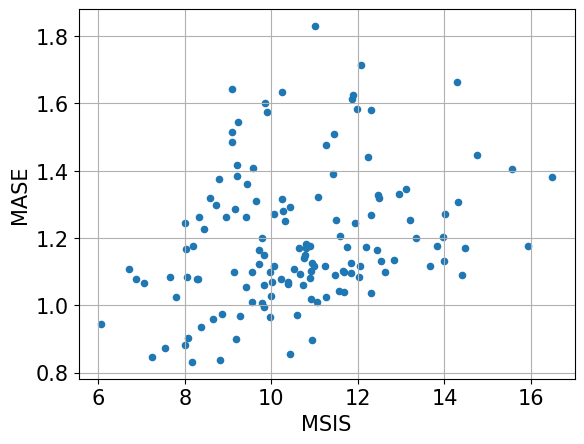

In [35]:
ts_metrics.plot(x="MSIS", y="MASE", kind="scatter")
plt.grid(which="both")
plt.show()

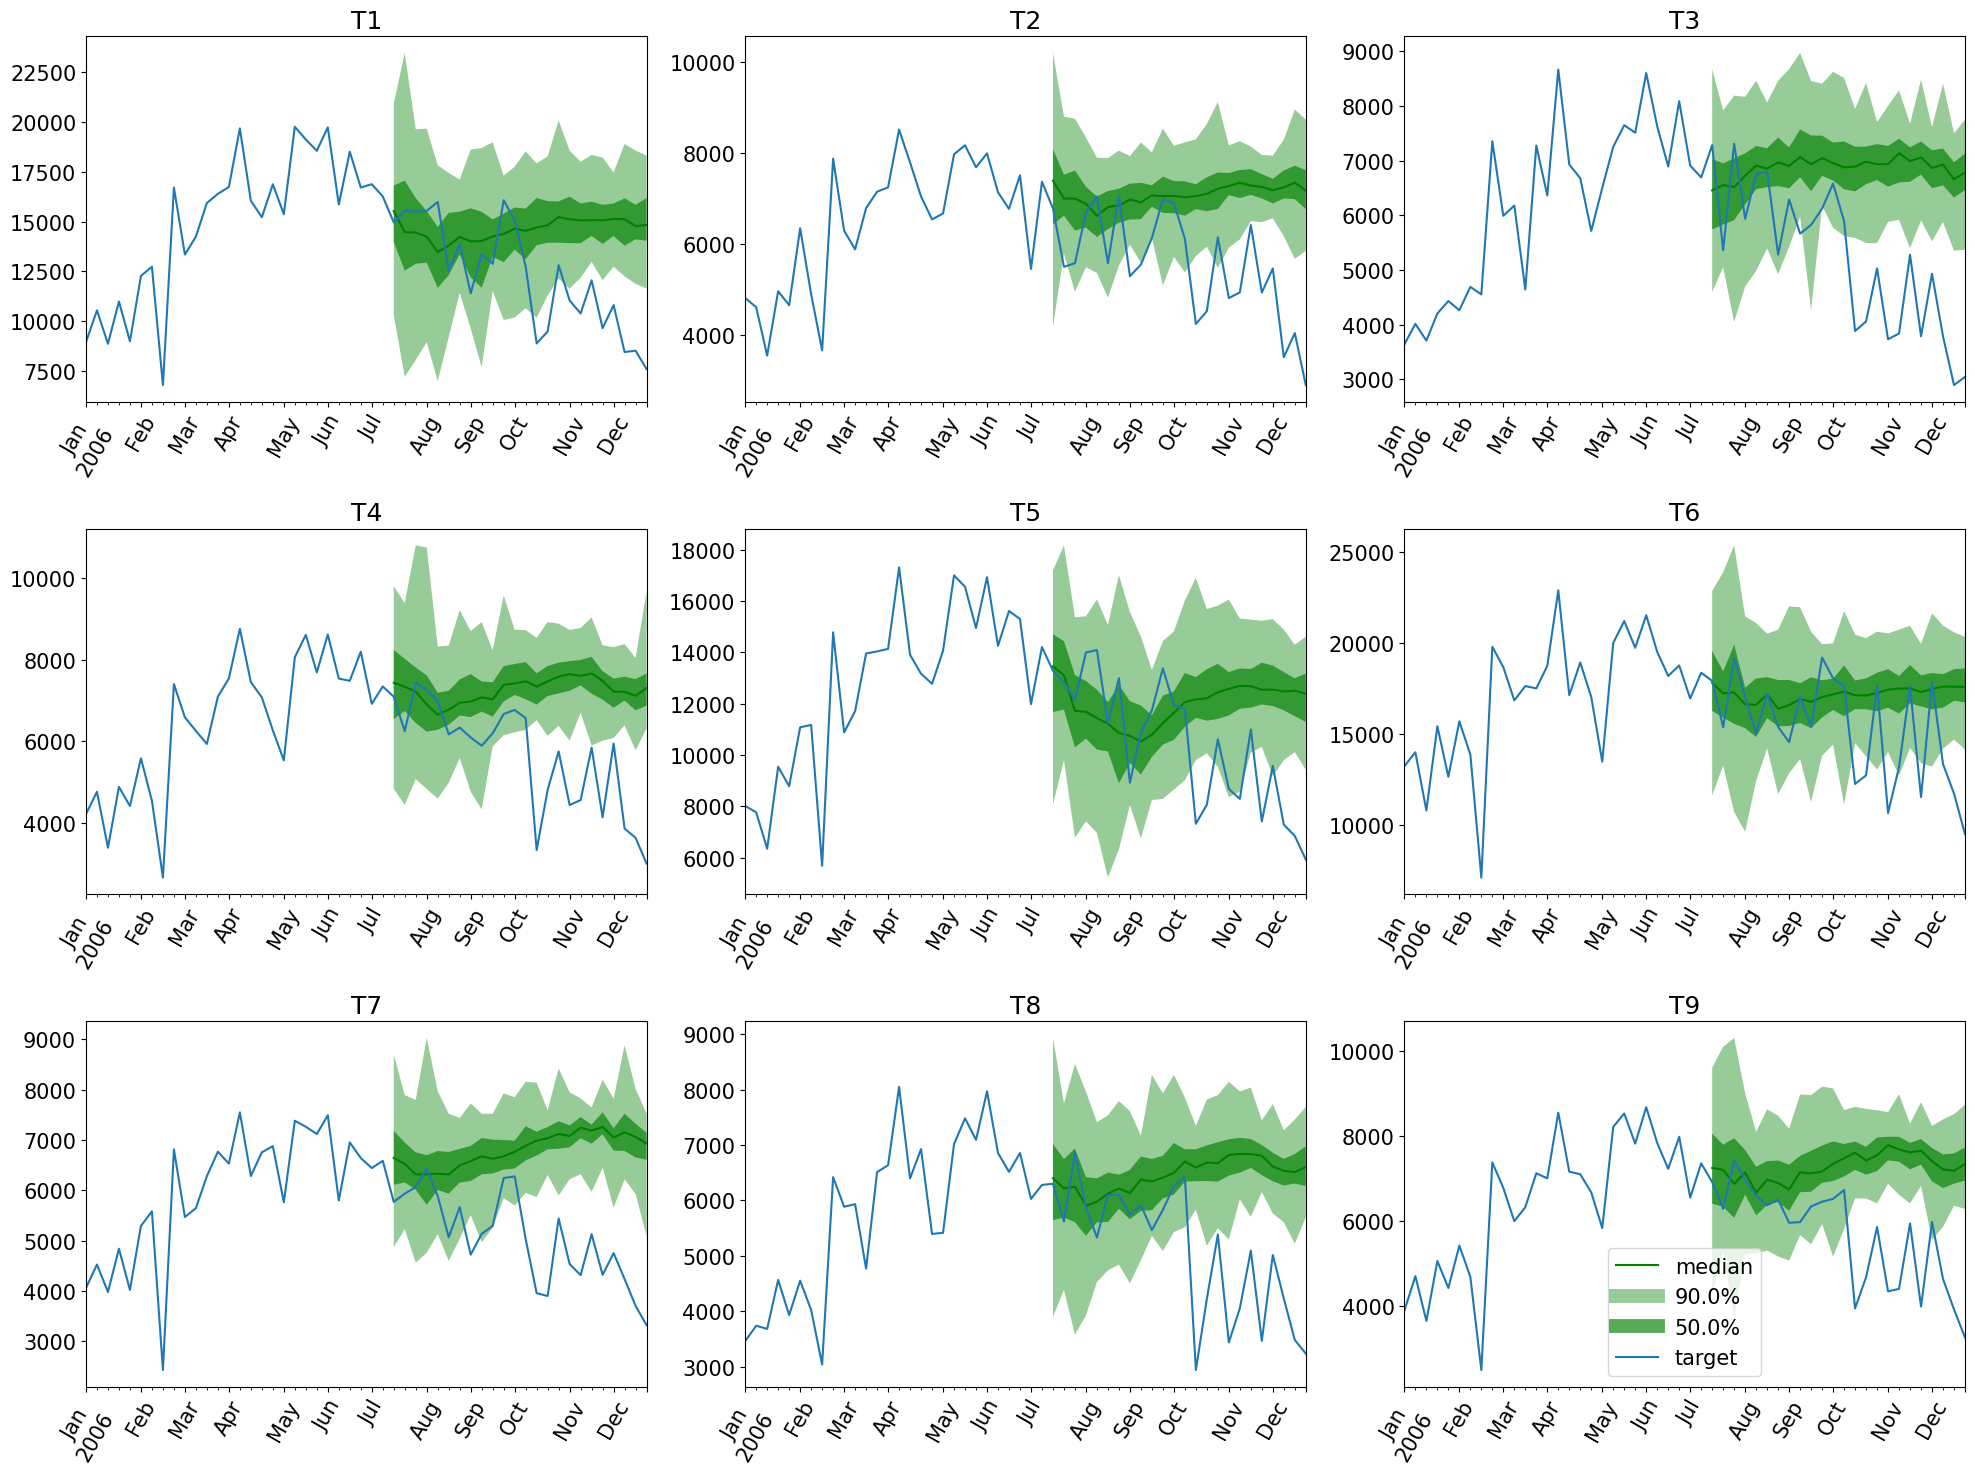

In [50]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * 24:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

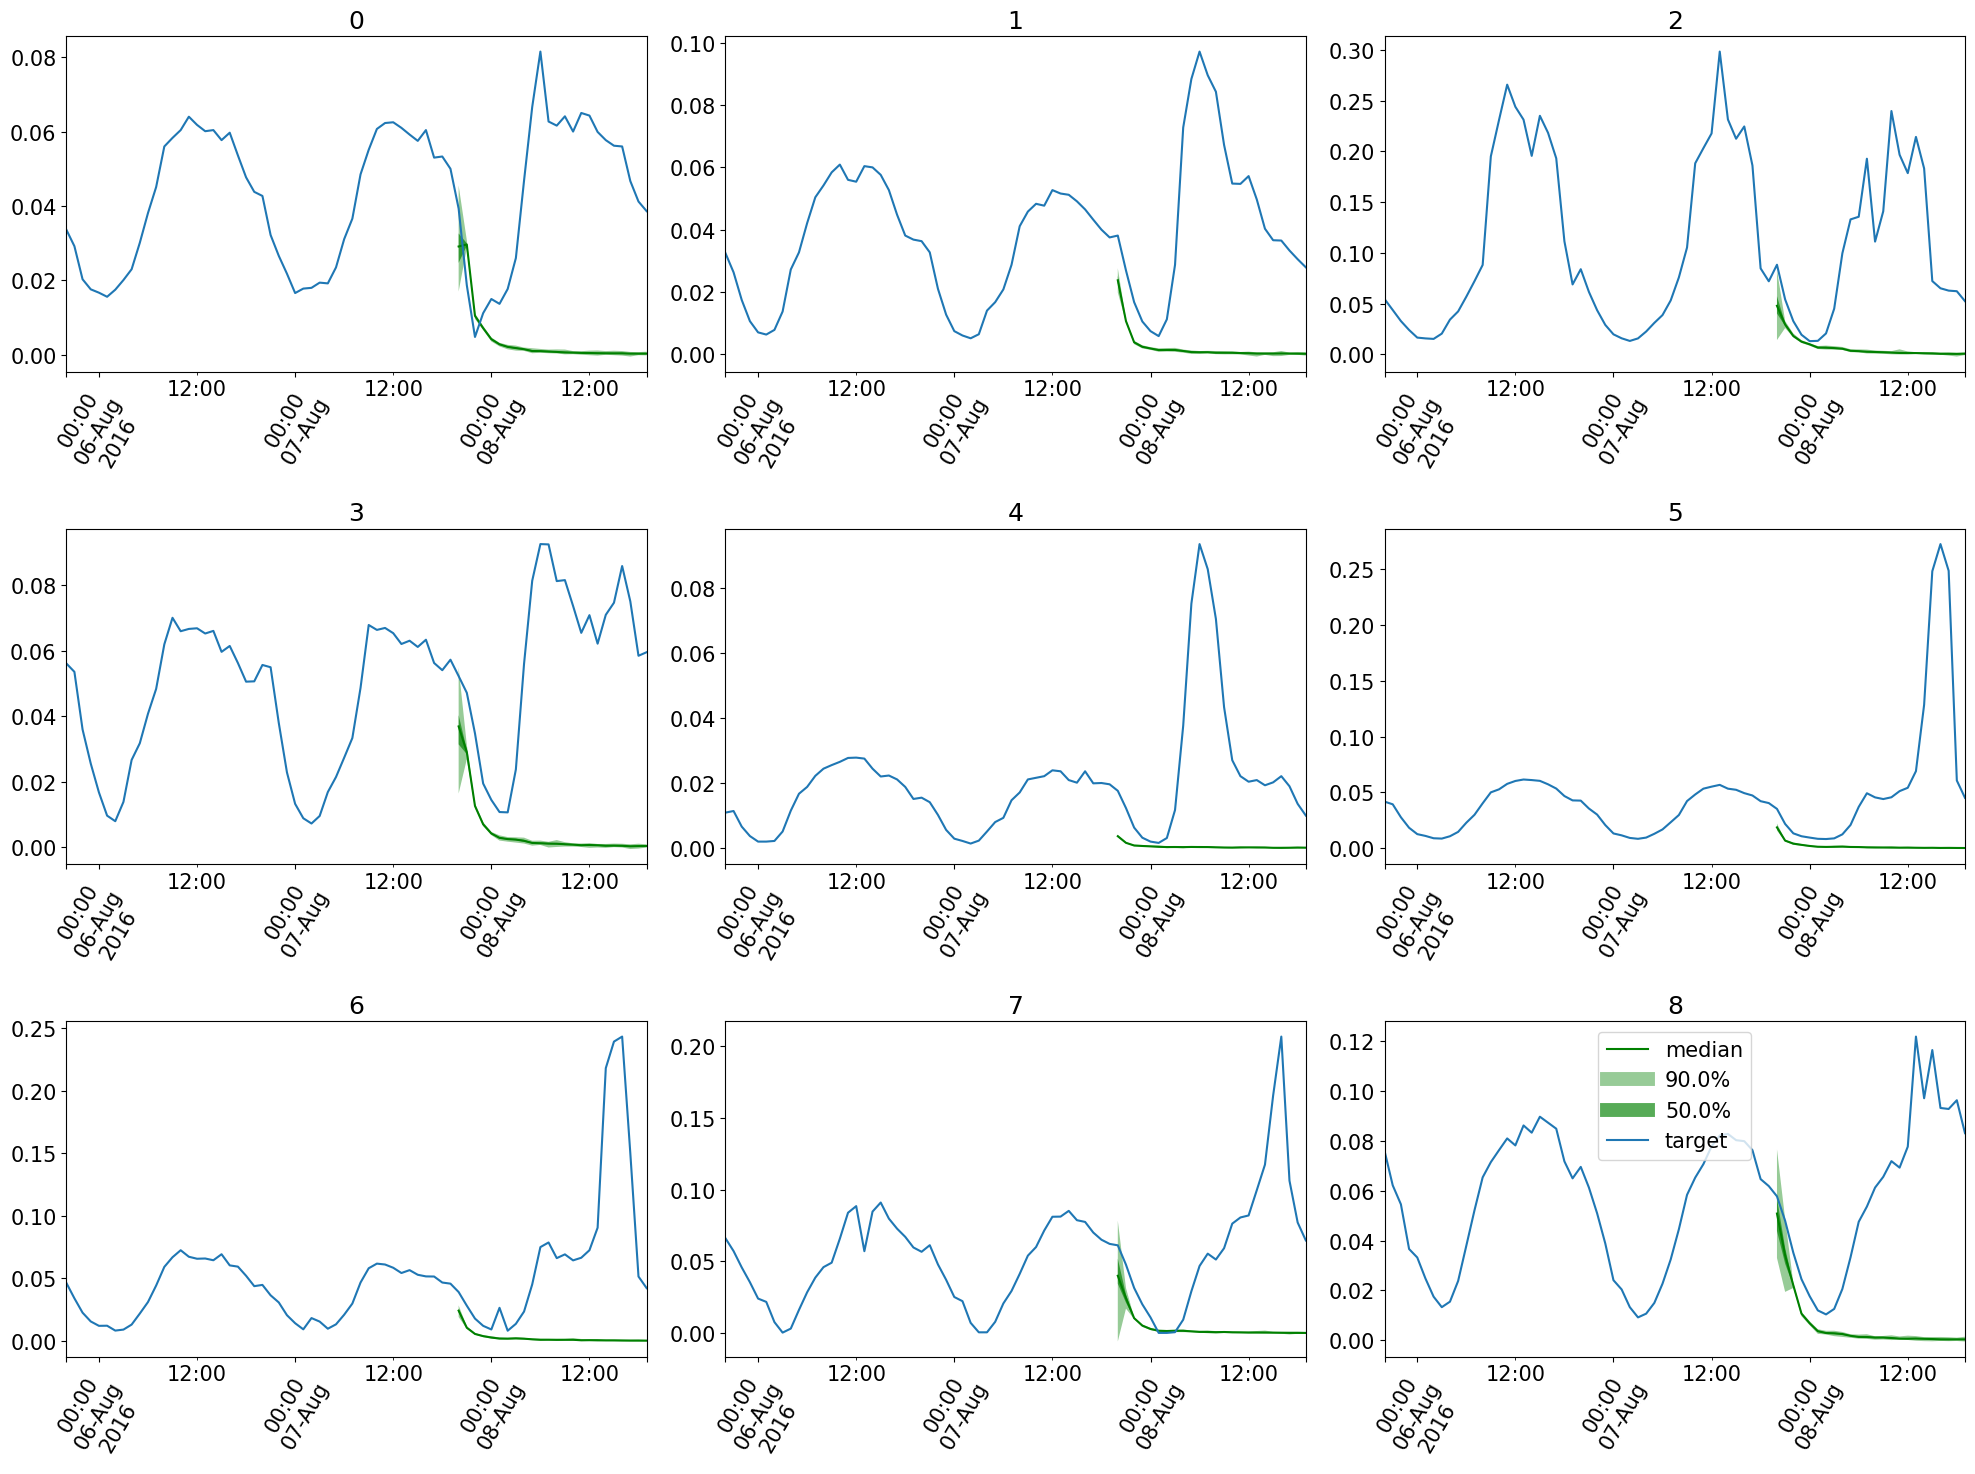

In [68]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * 24:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

In [10]:
# beam
agg_metrics

{'MSE': 2353700.5849478617,
 'abs_error': 10347671.897188187,
 'abs_target_sum': 128632956.0,
 'abs_target_mean': 2385.272140631954,
 'seasonal_error': 189.49338196116761,
 'MASE': 0.8922449918745382,
 'MAPE': 0.11220455807131616,
 'sMAPE': 0.1165269710200355,
 'MSIS': 12.069460309886567,
 'QuantileLoss[0.1]': 4623474.5003027115,
 'Coverage[0.1]': 0.15873015873015875,
 'QuantileLoss[0.2]': 6818143.679625946,
 'Coverage[0.2]': 0.23221703011422637,
 'QuantileLoss[0.3]': 8406636.595204707,
 'Coverage[0.3]': 0.29175938288087816,
 'QuantileLoss[0.4]': 9575201.4348929,
 'Coverage[0.4]': 0.34625797359442223,
 'QuantileLoss[0.5]': 10347671.921518601,
 'Coverage[0.5]': 0.4009790832220739,
 'QuantileLoss[0.6]': 10781971.85629762,
 'Coverage[0.6]': 0.45202863076694855,
 'QuantileLoss[0.7]': 10792582.533077706,
 'Coverage[0.7]': 0.5083815457647234,
 'QuantileLoss[0.8]': 10251792.43568935,
 'Coverage[0.8]': 0.579105473965287,
 'QuantileLoss[0.9]': 8707283.513710178,
 'Coverage[0.9]': 0.669707758492

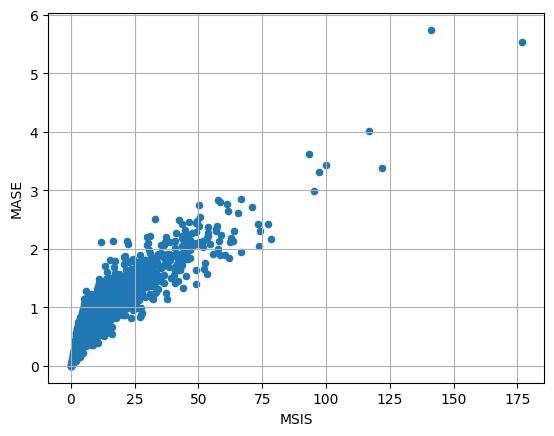

In [11]:
ts_metrics.plot(x="MSIS", y="MASE", kind="scatter")
plt.grid(which="both")
plt.show()

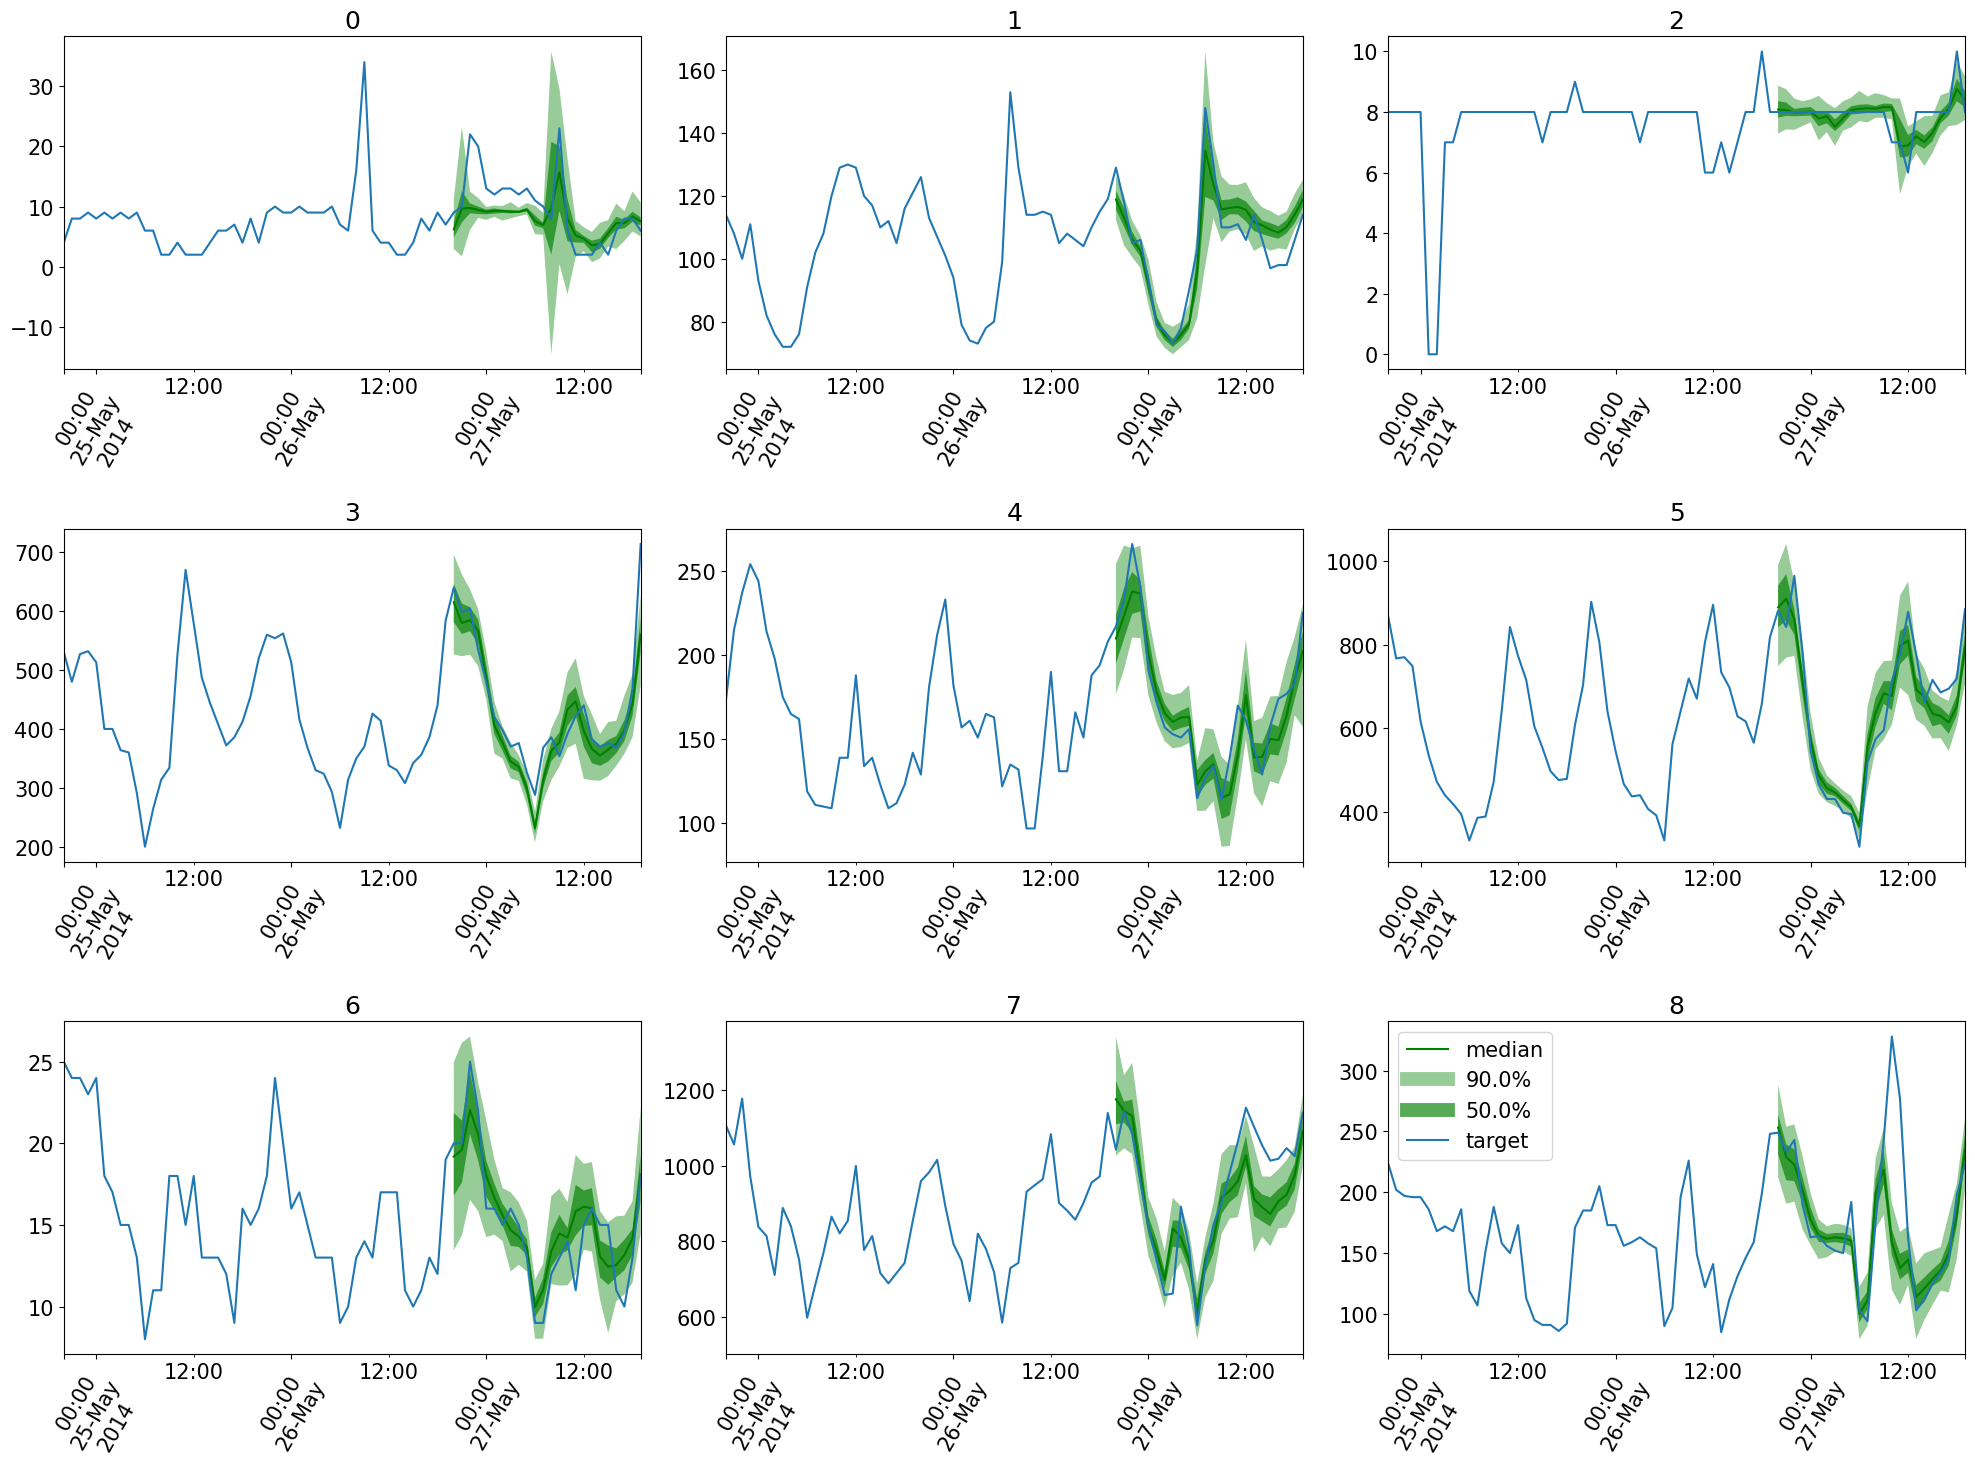

In [12]:
plt.figure(figsize=(20, 15))
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)
    forecast.plot(color='g')
    ts[-3 * dataset.metadata.prediction_length:][0].plot(label="target")
    plt.xticks(rotation=60)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()